In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [62]:
def plot_data(df):
    
    ys = df['Overall Gross'].str.replace('[\$,]', '', regex=True).astype(int)
    xs = np.arange(0,52,1)
    
    plt.figure(figsize = (12,8))
    plt.plot(xs,ys)
    plt.xticks(xs)
    plt.show()

In [56]:
def get_weekly_data(years):
    
    df_list = []
    
    for i in years:
        
        url = f"https://www.boxofficemojo.com/weekly/by-year/{i}/?sort=startDate&sortDir=asc&ref_=bo_wly__resort#table"
        
        table = pd.read_html(url)[0]
        table['Dates'] = table['Dates']+str(f' {i}')
        #df = clean_data(table)
        
        df_list.append(table)
     
    newdf = pd.concat(df_list,ignore_index = True)
    
    return newdf

In [61]:
df = get_weekly_data([2018])


,Dates,Top 10 Gross,%± LW,Overall Gross,%± LW.1,Releases,#1 Release,Genre,Budget,Running Time,Week,Long Weekend
47,Nov 30-Dec 6 2018,"$139,119,897",-44.1%,"$159,339,998",-40.2%,118,Ralph Breaks the Internet,-,-,-,48,False
48,Dec 7-13 2018,"$98,855,806",-28.9%,"$118,024,971",-25.9%,122,Ralph Breaks the Internet,-,-,-,49,False
49,Dec 14-20 2018,"$148,001,860",+49.7%,"$182,879,464",+54.9%,114,Spider-Man: Into the Spider-Verse,-,-,-,50,False
50,Dec 21-27 2018,"$365,938,858",+147.3%,"$414,509,628",+126.7%,89,Aquaman,-,-,-,51,False
51,"Dec 28-Jan 3, 2019 2018","$301,431,710",-17.6%,"$343,404,540",-17.2%,92,Aquaman,-,-,-,52,False


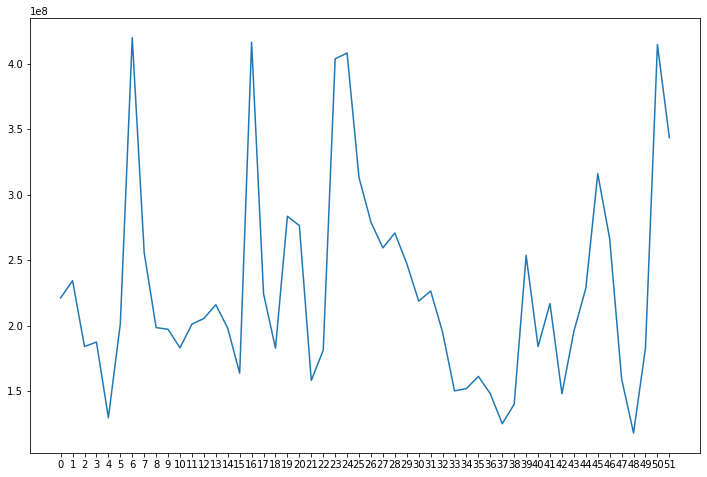

In [63]:
plot_data(df)